# Bike

В соревновании используется метрика среднеквадратичной логарифмической ошибки (RMSLE)

Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer


Загрузка данных

In [3]:
train_df = pd.read_csv('D:/Kode/MO/train.csv')
test_df = pd.read_csv('D:/Kode/MO/test.csv')

In [4]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Отделение целевой переменной

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,6493.0,2.493300,1.091258,1.00,2.0000,3.0000,3.0000,4.0000
holiday,6493.0,0.029108,0.168123,0.00,0.0000,0.0000,0.0000,1.0000
workingday,6493.0,0.685815,0.464226,0.00,0.0000,1.0000,1.0000,1.0000
weather,6493.0,1.436778,0.648390,1.00,1.0000,1.0000,2.0000,4.0000
temp,6493.0,20.620607,8.059583,0.82,13.9400,21.3200,27.0600,40.1800
atemp,6493.0,24.012865,8.782741,0.00,16.6650,25.0000,31.0600,50.0000
humidity,6493.0,64.125212,19.293391,16.00,49.0000,65.0000,81.0000,100.0000
windspeed,6493.0,12.631157,8.250151,0.00,7.0015,11.0014,16.9979,55.9986


Преобразование элементов столбца 'datetime' в формат datetime

In [8]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [9]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Вычленение из столбца 'datetime' в отдельные столбцы месяц, час и день недели

In [10]:
train_df['month'] = train_df['datetime'].apply(lambda t: t.month)
train_df['hour'] = train_df['datetime'].apply(lambda t: t.hour)
train_df['name_day'] = train_df['datetime'].apply(lambda t: t.dayofweek)

test_df['month'] = test_df['datetime'].apply(lambda t: t.month)
test_df['hour'] = test_df['datetime'].apply(lambda t: t.hour)
test_df['name_day'] = test_df['datetime'].apply(lambda t: t.dayofweek)

train_df = train_df.set_index('datetime')
test_df = test_df.set_index('datetime')

Перетасуем столбцы так, чтоб столбцы, производные от 'datetime', находились рядом для удобства

In [11]:
train_df = train_df[['month', 'hour', 'name_day', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
test_df = test_df[['month', 'hour', 'name_day', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]

In [12]:
train_y = train_df[['casual', 'registered', 'count']]
train_df_no_target = train_df.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1)

In [13]:
train_df_no_target.head(2)

,month,hour,name_day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,5,1,0,0,1,9.84,14.395,81,0.0
2011-01-01 01:00:00,1,1,5,1,0,0,1,9.02,13.635,80,0.0


In [14]:
train_y.head(2)

,casual,registered,count
datetime,,,
2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,8,32,40


# Анализ данных

In [15]:
train_df_analys = train_df.copy()

### Анализ завимости количества пользователей от погоды и сезона

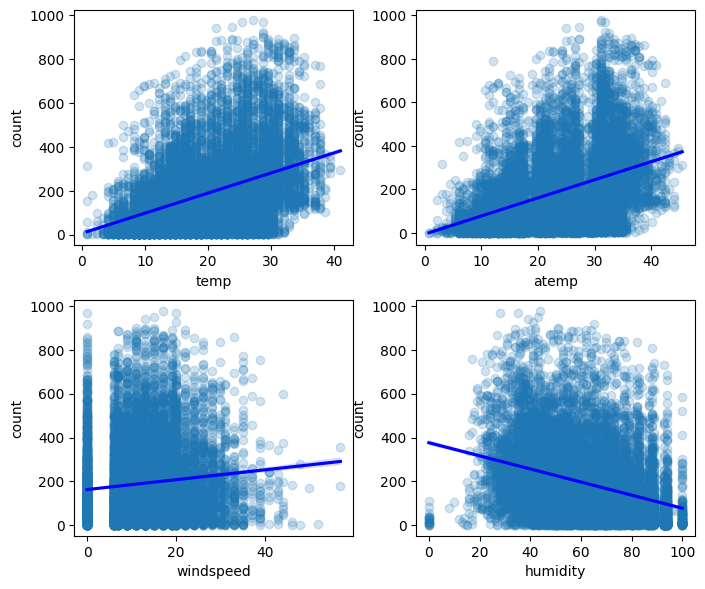

In [16]:
#mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)
sns.regplot(x='temp', y='count', data=train_df_analys, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train_df_analys, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train_df_analys, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train_df_analys, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

<Axes: xlabel='weather', ylabel='count'>

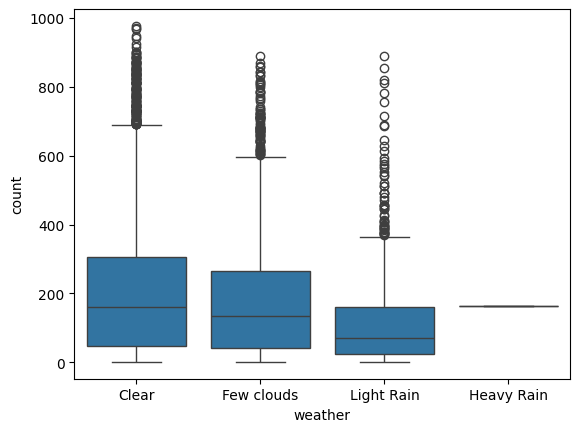

In [17]:
train_df_analys['weather'] = train_df_analys['weather'].map({1: 'Clear', 2: 'Few clouds', 3: 'Light Rain', 4: 'Heavy Rain'})
sns.boxplot(x='weather', y='count', data=train_df_analys)

**Выводы**

**1.Температура** Число пользователей при температуре чуть больше 20 градусов максимально, чем ниже температура, тем меньше пользователей

**2.Скорость ветра** Число пользователей наибольшее при минимальной скорости ветра

**3.Влажность** Также как и со скоротью ветра, чем меньше, тем больше пользователей

**4.Погода** Ясная погода преобладает в выборке, что подтверждаает еорию о том, что пользователи предпочитают более комфортную температуру для аренды велосипеда

Можно сделать вывод, что люди предпочитают брать велосипеды на прокат при максимально комфортных погодных условиях (комфортная температура, низкая скорость ветра, низкая влажность), а значит используют их в основном для прогулок.

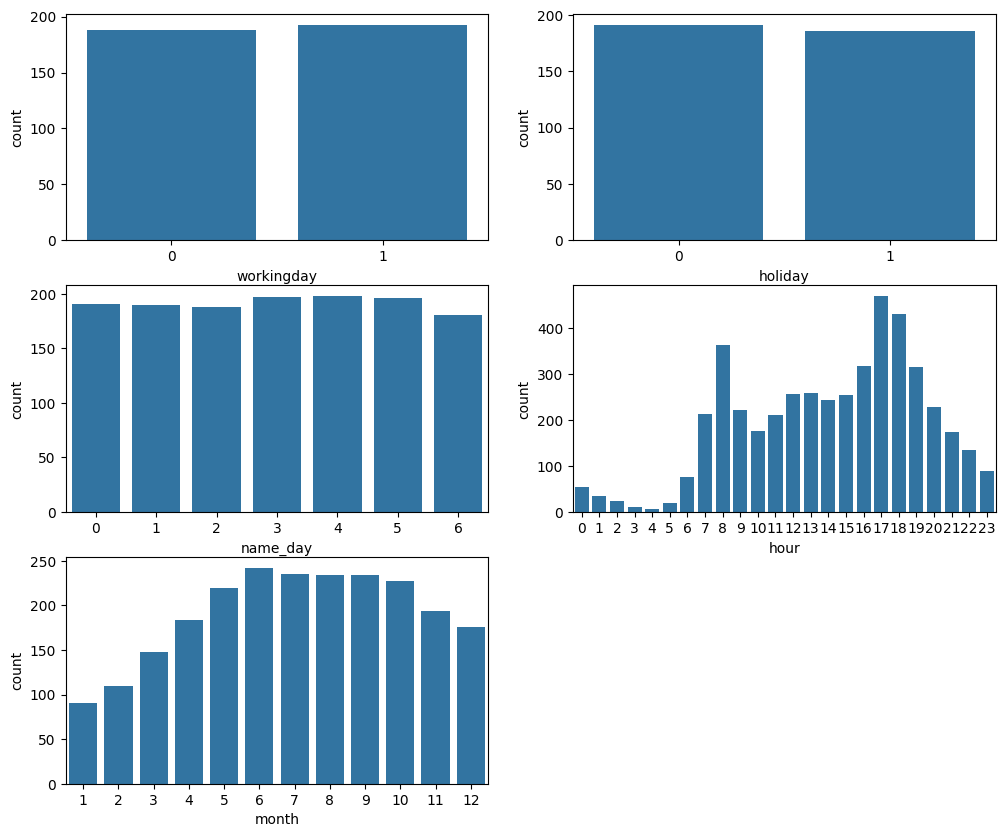

In [18]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(data=train_df_analys.groupby("workingday")["count"].mean().reset_index(), x="workingday", y="count")
ax2 = fig.add_subplot(3,2,2)
ax2 = sns.barplot(data=train_df_analys.groupby("holiday")["count"].mean().reset_index(), x="holiday", y="count")
ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(data=train_df_analys.groupby("name_day")["count"].mean().reset_index(), x="name_day", y="count")
ax4 = fig.add_subplot(3,2,4)
ax4 = sns.barplot(data=train_df_analys.groupby("hour")["count"].mean().reset_index(), x="hour", y="count")
ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(data=train_df_analys.groupby("month")["count"].mean().reset_index(), x="month", y="count")

**Выводы**

**1.Рабочие** дни и праздники В основном количество пользователей не зависит от дня, т.к. разница совсем небольшая

**2. День** недели Сильной заисимости количества пользователей от дня недели нет, немного преобладает середина недели (среда, четверг)

**3.Время суток** Наибольшое количество пользователей в 8 утра, в 5 и в 6 вчере, именно в это время люди уходят и возвращаются с работы, середина дня также встречается в выборке чаще, чем вечернее время

**4.Месяц** Чаще всего в выборке встречаются летние месяцы, что очевиднно, т.к. это теплое время года, затем количество пользователей падает и меньше всего их в январе.


### Тепловая карта корреляции признаков

Text(0.5, 1.0, 'Корреляция признаков')

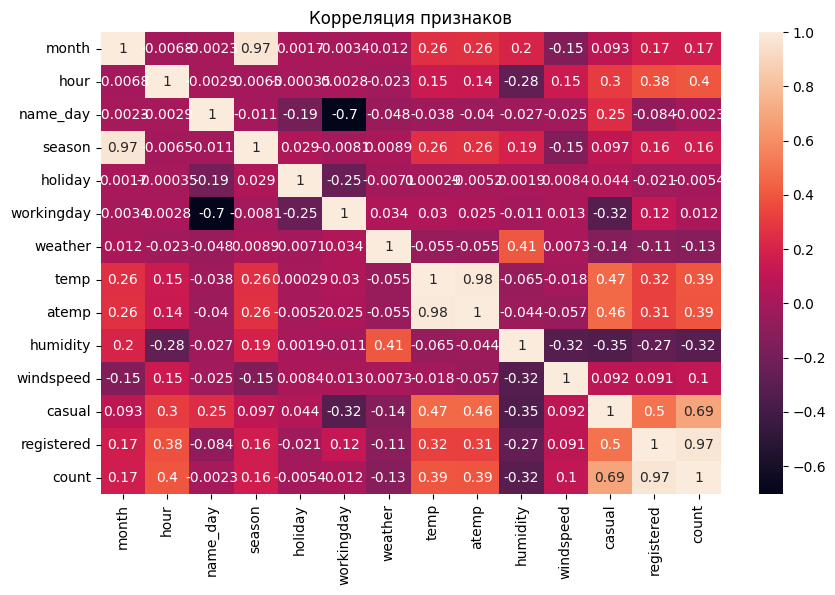

In [19]:
plt.figure(figsize= (10, 6))
sns.heatmap(train_df.corr(), annot = True)
plt.title("Корреляция признаков")

**Выводы**

Сильно коррелируют друг с другом:
- **temp** и **atemp**
- **month** и **season**
Умеренно коррелируют друг с другом:
- **name_day** и **workingday**

## Подготовка данных

### Проверка данных на пропущенные значения

In [20]:
train_df.isnull().sum()

month         0
hour          0
name_day      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- Пропусков нет

Устранение выбросов

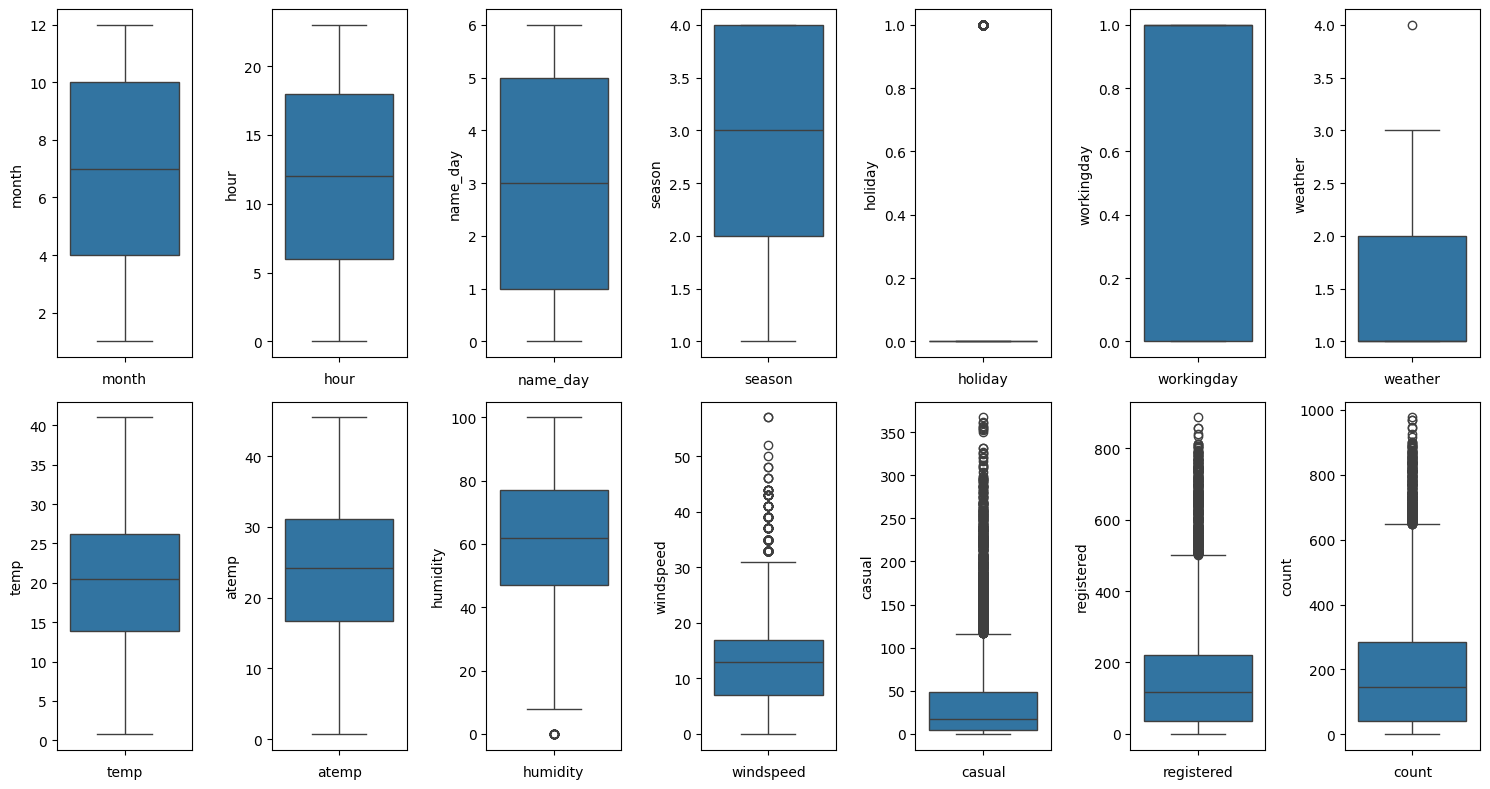

In [21]:
plt.figure(figsize=(15, 8))

i = 1
for col in train_df.columns:
  plt.subplot(2, 7, i)
  sns.boxplot(data=train_df, y=col)
  plt.xlabel(col)
  plt.tight_layout()
  i+=1

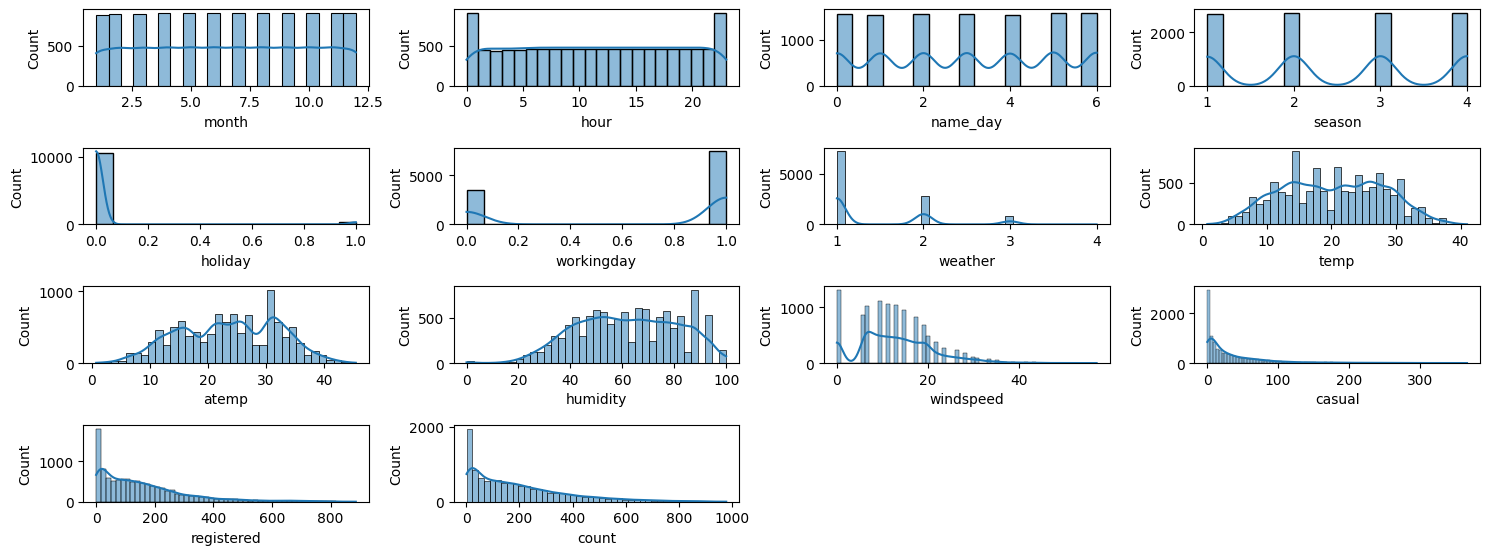

In [22]:
plt.figure(figsize=(15, 8))

i = 1
for col in train_df.columns:
  plt.subplot(6, 4, i)
  sns.histplot(data=train_df, x=col, kde=True)
  plt.xlabel(col)
  plt.tight_layout()
  i+=1

Функция для удаления выбросов

In [23]:
def clip_outliers(tr_df):
    df = tr_df
    for col in df.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [24]:
train_df_clear = clip_outliers(train_df)

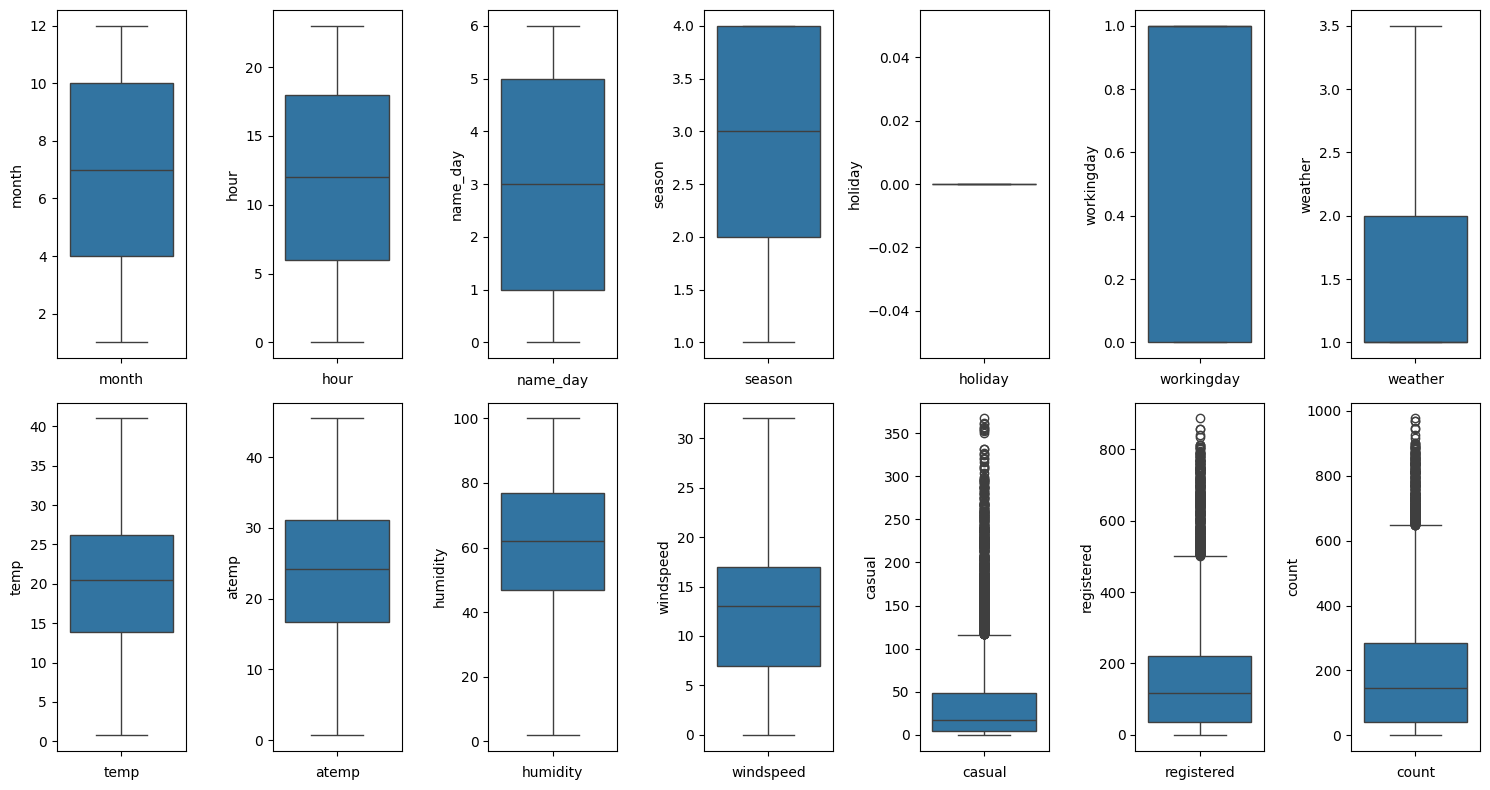

In [25]:
plt.figure(figsize=(15, 8))

i = 1
for col in train_df_clear.columns:
  plt.subplot(2, 7, i)
  sns.boxplot(data=train_df_clear, y=col)
  plt.xlabel(col)
  plt.tight_layout()
  i+=1

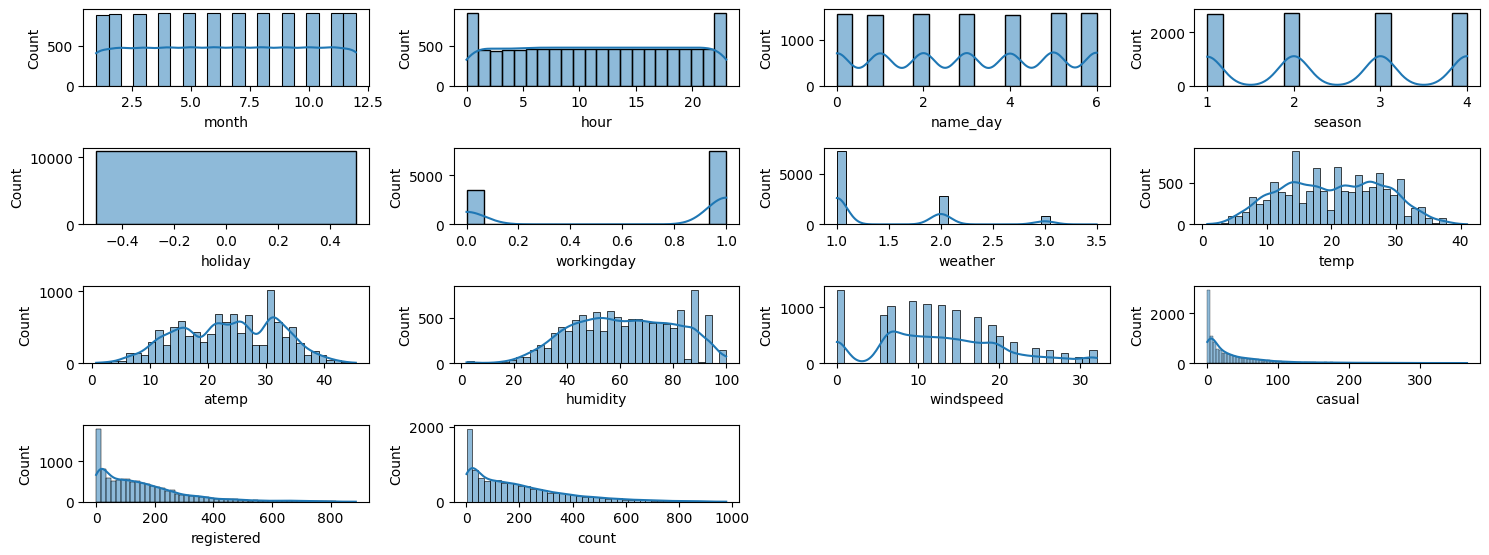

In [26]:
plt.figure(figsize=(15, 8))

i = 1
for col in train_df_clear.columns:
  plt.subplot(6, 4, i)
  sns.histplot(data=train_df_clear, x=col, kde=True)
  plt.xlabel(col)
  plt.tight_layout()
  i+=1

Приведение к нормальному виду распределения целевой переменной

Text(0.5, 1.0, 'cbrt')

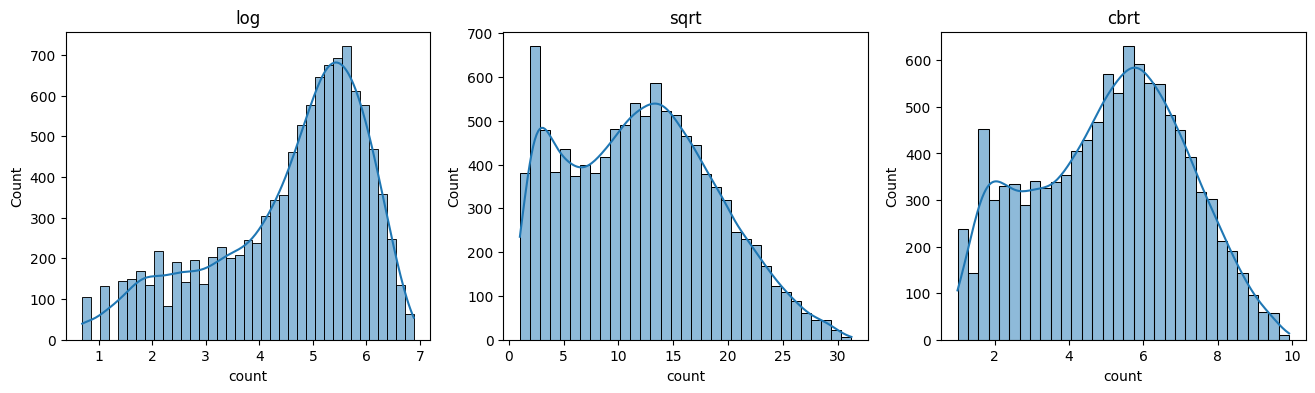

In [27]:
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.histplot(np.log1p(train_df['count']),kde=True, ax=axs[0]).set_title("log")
sns.histplot(np.sqrt(train_df['count']),kde=True, ax=axs[1]).set_title("sqrt")
sns.histplot(np.cbrt(train_df['count']),kde=True, ax=axs[2]).set_title("cbrt")

Больше всего к нормальному виду приближено распределение от переменной под кубическим корнем 

## Общие функции

Функция для записи прогноза в файл

In [28]:
def write_to_submission_file(predicted_labels, out_file,
                             target='count', index_label='datetime'):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = test_df.index,
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [29]:
rmsle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

In [30]:
def plot_true_vs_pred(y_pred, y_true, t_from, t_to, text_title):
    fig = plt.figure(figsize=(18, 13))

    axes = fig.add_subplot(2, 1, 1)
    axes.plot(y_true.sort_index().loc[t_from:t_to], label='True', marker='.', markersize=15)
    axes.plot(y_pred.sort_index().loc[t_from:t_to], label='Predicted', marker='.', markersize=15)
    axes.set(xlabel='Time', ylabel='Count', title=text_title)
    axes.legend()
    plt.show()


In [31]:
def model_score(X, Y, model, model_params = {}, text_title='', paramsSearch = False, testPred = False, X_test=None, size=0.8):
    '''
    testPred - режим работы с тестовыми данными
    paramsSearch - режим с подбором параметров моделей
    '''
    if testPred == True:
        size = 1.0
        x_train = X
        y_train = Y
    else:
        x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size=size, random_state=17)

    if paramsSearch == True:
        model_grid = GridSearchCV(model, model_params,
                                cv=3, n_jobs=-1,
                                verbose=True, scoring=rmsle_scorer)
        model = model_grid

    model.fit(x_train, np.cbrt(y_train))
    
    if testPred == True:
        x_valid = X_test
    
    pred = model.predict(x_valid)
    pred = pred**3
    
    if testPred == False:
        score = mean_squared_log_error(y_pred=pred, y_true=y_valid)

        predicted_df = pd.DataFrame(pred,
                                    index = x_valid.index,
                                    columns=['count'])

        plot_true_vs_pred(predicted_df, y_valid, '2012-08-10 00:00:00', '2012-08-19 00:00:00', text_title)
    if testPred == True:
        return pred
    elif paramsSearch == True:
        return score, model.best_params_
    else :
        return score
        

Метрика, используемая в соревновании

## Дерево решений

### Обучение без настройки параметров дерева

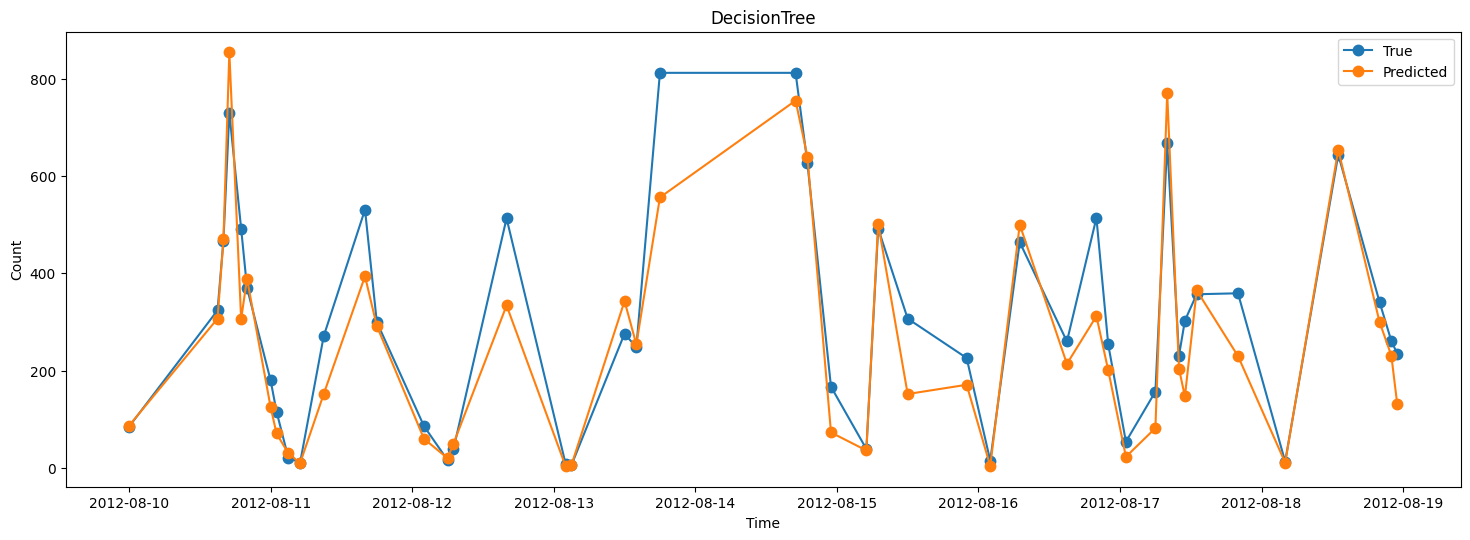

0.2678255064402049

In [185]:
model_score(train_df_no_target, train_y['count'], DecisionTreeRegressor(random_state=17), text_title='DecisionTree')

### Нахождение лучших параметров дерева

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


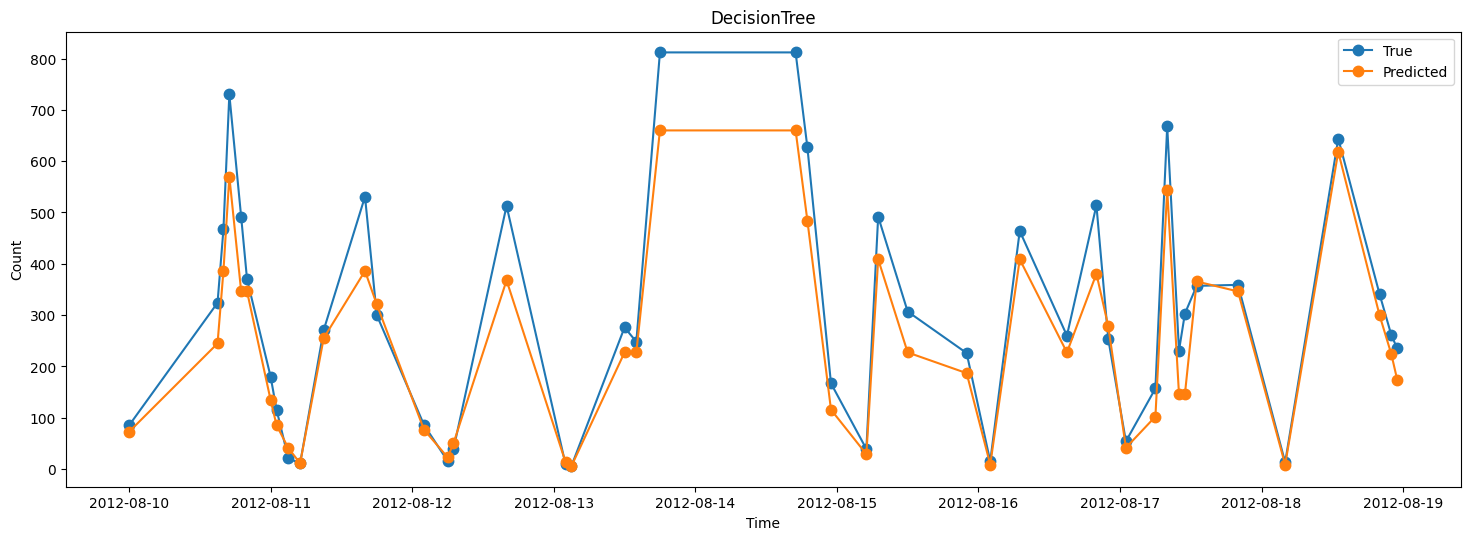

(0.2093956002834668,
 {'criterion': 'poisson',
  'max_depth': 13,
  'min_samples_leaf': 8,
  'min_samples_split': 5})

In [ ]:
tree_params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'max_depth': list(range(5, 30, 4)), 
               'min_samples_leaf': list(range(5, 15, 3)),
               'min_samples_split': list(range(5, 15, 3))}
model_score(train_df_no_target, train_y['count'], DecisionTreeRegressor(random_state=17), model_params=tree_params, paramsSearch=True , text_title='DecisionTree')

- Настройка модели уменьшила среднеквадратичную ошибку с **0.268** до **0.209** на **0.059**

## Random Forest

### Обучение без настройки параметров случайного леса

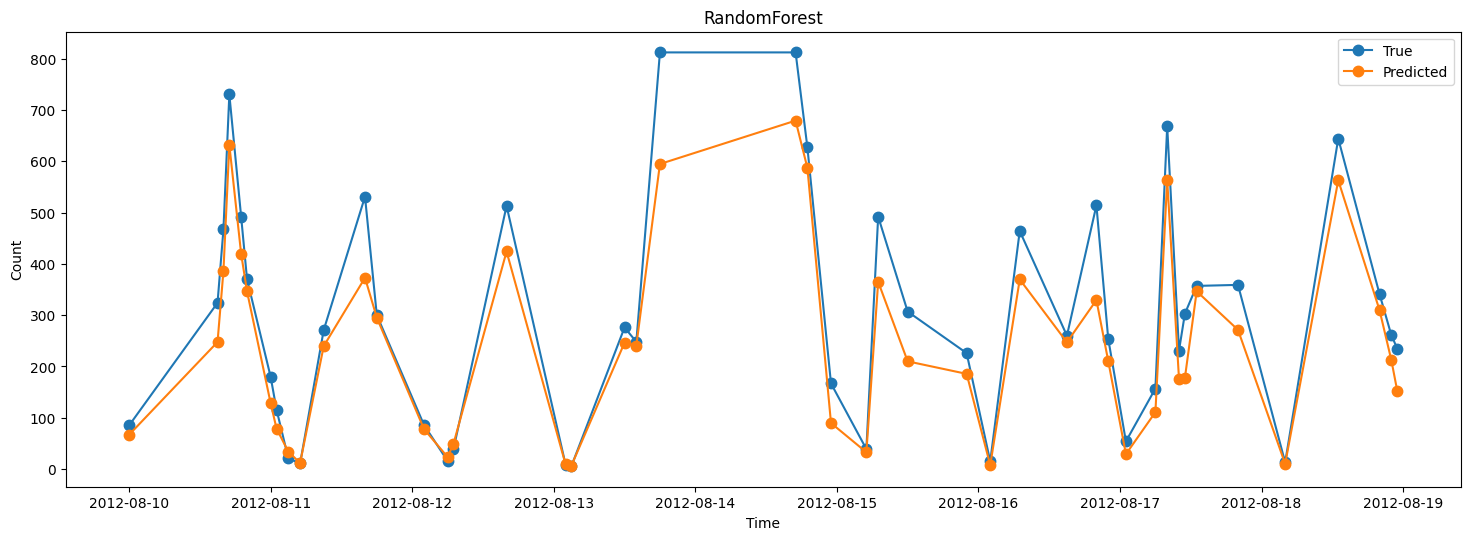

0.14254923796571425

In [211]:
model_score(train_df_no_target, train_y['count'], RandomForestRegressor(n_estimators=500, random_state=17), text_title='RandomForest')

Без выбросов:

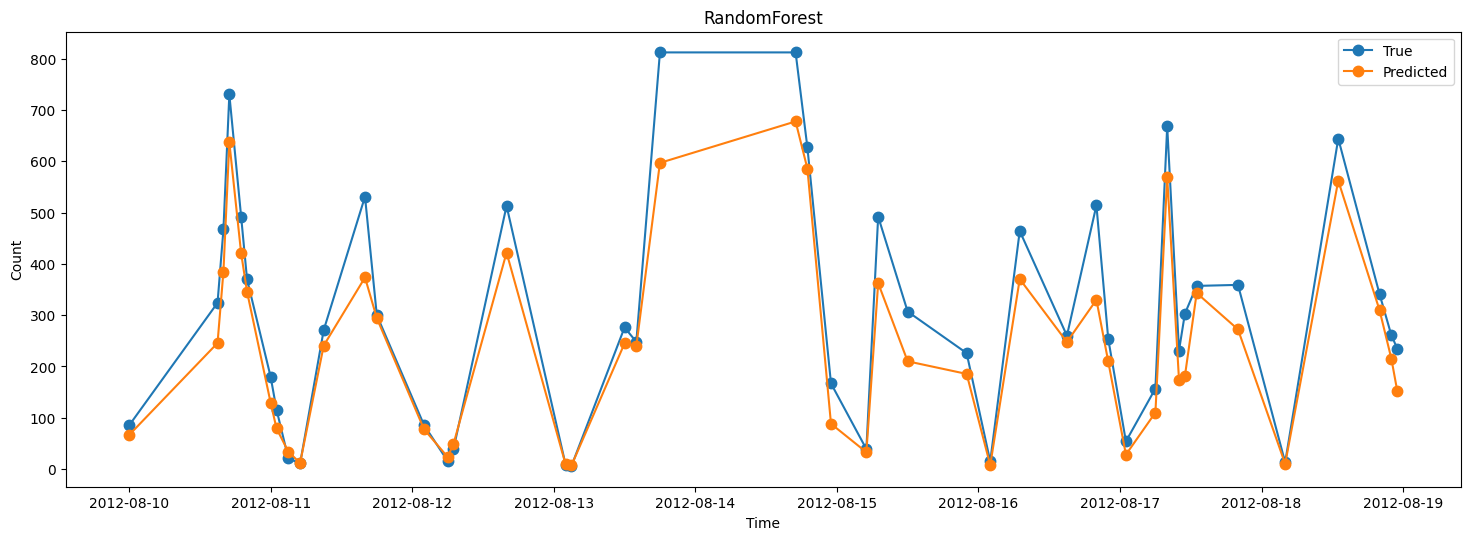

0.14258373697306187

In [204]:
model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['count'], RandomForestRegressor(n_estimators=500, random_state=17), text_title='RandomForest')

### Нахождение лучших параметров случайного леса

In [28]:
r_forest_params = {'max_depth': range(10, 50, 10), 'max_features': range(10, 20, 5),
                   'min_samples_leaf': range(2, 10, 2), 'n_estimators': [200], 
                   'min_samples_split': [0.0001, 0.001, 0.002, 0.005, 0.01]} 

Fitting 3 folds for each of 160 candidates, totalling 480 fits


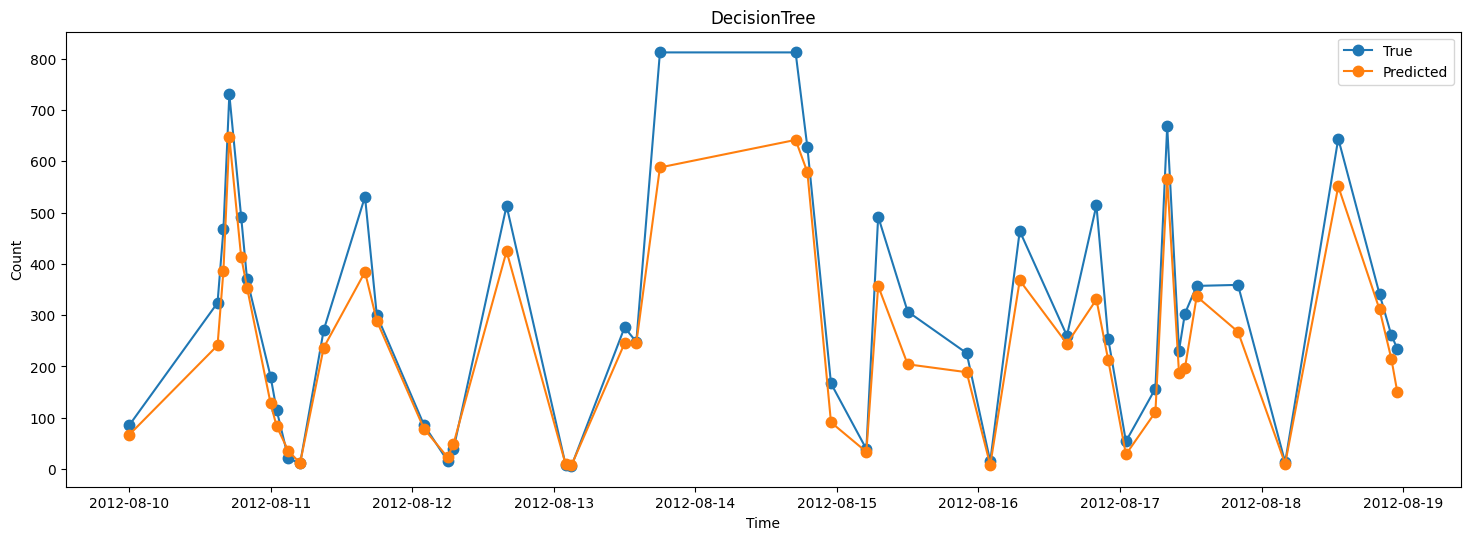

(0.1421673268050581,
 {'max_depth': 40,
  'max_features': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 0.0001,
  'n_estimators': 200})

In [30]:
model_score(train_df_no_target, train_y['count'], RandomForestRegressor(random_state=17), model_params=r_forest_params, paramsSearch=True, text_title='DecisionTree')
#(0.1421673268050581,
# {'max_depth': 40,
#  'max_features': 10,
#  'min_samples_leaf': 2,
#  'min_samples_split': 0.0001,
#  'n_estimators': 200})

### Разделение данных на рабочие и не рабочие дни

In [32]:
train_df_working = train_df[train_df['workingday'] == 1]
train_df_no_working = train_df[train_df['workingday'] == 0]

y_train_working = train_df_working['count']
y_train_no_working = train_df_no_working['count']

train_df_working = train_df_working.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1)

train_df_no_working = train_df_no_working.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1)

test_df_working = test_df[test_df['workingday'] == 1]
test_df_no_working = test_df[test_df['workingday'] == 0]

In [33]:
rforest_working = RandomForestRegressor(n_estimators=200)
rforest_working.fit(train_df_working, y_train_working)

rforest_pred_working = rforest_working.predict(train_df_working)

In [34]:
rforest_no_working = RandomForestRegressor(n_estimators=200)
rforest_no_working.fit(train_df_no_working, y_train_no_working)

rforest_pred_no_working = rforest_no_working.predict(train_df_no_working)

In [35]:
rforest_pred_working = rforest_pred_working
rforest_pred_no_working = rforest_pred_no_working

In [36]:
predicted_df_working = pd.DataFrame(rforest_pred_working,
                                index = train_df_working.index,
                                columns=['count'])
predicted_df_no_working = pd.DataFrame(rforest_pred_no_working,
                                index = train_df_no_working.index,
                                columns=['count'])
predicted_df_ftree_split = pd.concat([predicted_df_working, predicted_df_no_working])

In [37]:
mean_squared_log_error(y_true=train_y['count'], y_pred=predicted_df_ftree_split)

1.9294829654774117

Разделение на **registered**, **casuas**

In [91]:
rforest_pred_reg = model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['registered'], RandomForestRegressor(n_estimators=200), testPred=True, X_test=train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1))

In [92]:
rforest_pred_cas = model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['casual'], RandomForestRegressor(n_estimators=200), testPred=True, X_test=train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1))

In [93]:
rforest_pred_rc = rforest_pred_reg
rforest_pred_rc += rforest_pred_cas.ravel()

In [94]:
mean_squared_log_error(train_y['count'], rforest_pred_rc)

0.019264863330027623

In [22]:
rforest_pred_count = model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['count'], RandomForestRegressor(n_estimators=200), testPred=True, X_test=train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1))

In [23]:
mean_squared_log_error(train_y['count'], rforest_pred_count)

0.020389816259563848

### Предсказание **test_df** с подбором параметров randomForest

In [38]:
rforest_test_pred_reg = model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['registered'], RandomForestRegressor(n_estimators=200), model_params=r_forest_params, paramsSearch=True, testPred=True, X_test=test_df)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


In [39]:
rforest_test_pred_cas = model_score(train_df_clear.drop('casual', axis=1).drop('registered', axis=1).drop('count', axis=1), train_y['casual'], RandomForestRegressor(n_estimators=200), model_params=r_forest_params, paramsSearch=True, testPred=True, X_test=test_df)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


In [40]:
rforest_test_pred_rc = rforest_test_pred_reg
rforest_test_pred_rc += rforest_test_pred_cas.ravel()

In [41]:
write_to_submission_file(rforest_test_pred_rc, 'reg_cas_4_all_clear.csv') #0.45585